In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import collections
from collections import defaultdict
import operator
import numpy as np

In [22]:
joined_tables = pd.read_csv('joined_tables.csv',index_col=0)
joined_tables.shape

list1=[]
for x in joined_tables['CNTRC']:
    if str(x).replace(',', '').isdigit():
        list1.append(str(x).replace(',', ''))
    else: list1.append(x)
        
joined_tables['CNTRC']=list1
joined_tables = joined_tables.astype({"CNTRC": str})
joined_tables = joined_tables[joined_tables.CNTRC.apply(lambda x: x.isnumeric())]
joined_tables.shape

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (13,21,41) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(136405, 52)

In [23]:
joined_tables['year_of_tender'] = [date.split('-')[0] for date in joined_tables['OPENING_DATE'].values]
num_tenders_per_year = joined_tables.groupby('year_of_tender')['TENDERNO'].nunique()
num_tenders_per_year = num_tenders_per_year.reset_index()
num_tenders_per_year.rename(columns={'TENDERNO':'number_of_tenders_in_same_year'}, inplace=True)
joined_tables = pd.merge(joined_tables, num_tenders_per_year, on=['year_of_tender'], how='left')

DATEROAD DISTRIBUTION PER TENDER

In [24]:
joined_tables = joined_tables[joined_tables['DATEROAD'].notna()]

In [25]:
joined_tables['DATEROAD']=[(str(x)[-2:]) for x in joined_tables['DATEROAD']]

In [26]:
# סידרנו את השנתון והוספנו עמודה של גיל
year=[]
for y in joined_tables['DATEROAD']:
    if int(y)>30:
        year.append('19' + str(y))
    else:
        year.append('20' + str(y))
        
joined_tables['DATEROAD'] = year  
joined_tables['DATEROAD']=joined_tables['DATEROAD'].astype(int)
joined_tables['year_of_tender']=joined_tables['year_of_tender'].astype(int)
joined_tables['AGE']=joined_tables['year_of_tender']-joined_tables['DATEROAD']

In [8]:
# כמה רכבים עם אותו שנתון יש במכרז
year=joined_tables.groupby(['TENDERNO','DATEROAD'], as_index=False).count()
year = year.rename({'CARNO':'DATEROAD_NUM'},axis=1)
year = year[['TENDERNO', 'DATEROAD','DATEROAD_NUM']]

In [27]:
# הוספה של עמודה של קטגוריה של ק"מ בקפיצות של 10000
joined_tables=joined_tables.astype({"CNTRC": int})
joined_tables['KM']=joined_tables['CNTRC'] // 10000

In [10]:
# כמה רכבים באותו מכרז בעלי אותו ק"מ
km=joined_tables.groupby(['TENDERNO','KM'], as_index=False).count()
km = km.rename({'CARNO':'KM_NUM'},axis=1)
km = km[['TENDERNO', 'KM','KM_NUM']]

In [28]:
# ניקוי ויישור קן של עמודת יצרן הרכב
pro=[]
for p in joined_tables['PRODUCT']:
     
    if p in ['פולקסווגן','פולקסוואגן','פולגסווגן','פולקסווגן','פולגסוואגן', 'פולקסואגן','וולקסוואגן','פולקסווגן','פולקסווגן', 'פולקסווגן T5 קצר גג רגיל']:
        pro.append('פולגסוואגן')
    elif p in ['סאן יאנג','סאן-יאנג','סאניונג','סאנגיונג','סאן יאנג טיואן','סאן יאנג סין','סאן  יאנג','סאניאנג','קואנג יאנג']:
        pro.append('סאן  יאנג')
   
    elif p in ['אודי','אאודי']:
        pro.append('אודי')
    elif p in ['קאיה','קיה','קיאה']:
        pro.append('קיה')
    elif p in ['במוו','ב.מ.וו','BMW','B.M.W']:
        pro.append('BMW')
    elif p in ['מזדה','מאזדה']:
        pro.append('מאזדה')
    elif p in ['טויוטה','טיוטה']:
        pro.append('טויוטה')
    elif p in ['מיציבושי','מיצובישי']:
        pro.append('מיצובישי')
    elif p in ['ימהה יפן','ימהה','ימאהה']:
        pro.append('ימהה')
    elif p in ['פיאג`ו', "פג'ו", 'פיג`ו',"פיג'ו",'פגו',"פיגו'",'פיגו',"פיאג'ו","פגו'"]:
        pro.append('פגו')
    elif p in ['קאווסאקי','קאווסקי','קוואסקי','קוואסאקי']:
        pro.append('קאווסאקי')
    elif p in ['ניסן מקסיקו','ניסן','ניסאן']:
        pro.append('ניסן')
    elif p in ['סובארו','סוברו']:
        pro.append('סוברו')
    elif p in ['דיאליס','דיאלים']:
        pro.append('דיאלים')
    elif p in ['וולבו','וולוו']:
        pro.append('וולוו')
    elif p in ['דיימלר קרייזלר','קרייזלר']:
        pro.append('קרייזלר')
    elif p in ['פולריס','פולאריס']:
        pro.append('פולאריס')
    elif p in ['מאן','MAN']:
        pro.append('MAN')    
    else:
        pro.append(p)
        
joined_tables['PRODUCT']=pro

In [29]:
# ניקוי וישור קו של עמודת הגיר
gear=[]
for g in joined_tables['GEAR_TYPE']:
    if g in ['אוטומט','אוטומטי','אוטומטית','א','אוטמט']:
        gear.append('auto')
    elif g=='ידני':
        gear.append('manual')
    elif g=='רובוטית':
        gear.append('robot')
    else: gear.append('unknown')
joined_tables['GEAR_TYPE']=gear

In [13]:
# כמה רכבים של אותו יצרן היו במרכז
product= joined_tables.groupby(['TENDERNO','PRODUCT'], as_index=False).count()
product= product.rename({'CARNO': 'PRODUCT_NUM'}, axis=1)
product = product[['TENDERNO', 'PRODUCT', 'PRODUCT_NUM']]

In [14]:
# איחוד של כל 3 הטבלאות שיצרנו למעלה עם הטבלה המקורית של ההצעות
joined_tables= pd.merge(joined_tables, km, on =['TENDERNO', 'KM'], how='left')
joined_tables= pd.merge(joined_tables, year, on =['TENDERNO', 'DATEROAD'], how='left')
joined_tables= pd.merge(joined_tables, product, on =['TENDERNO', 'PRODUCT'], how='left')

In [15]:
# הצעות על רכבים ללא יצרן ירדו מהטבלה
joined_tables = joined_tables[joined_tables['PRODUCT'].notna()]

In [30]:
# סדר בעמודת תו הסחר- הכנסנו 0 ו-1 
joined_tables['TRADE']=joined_tables['TRADE'].str.replace('X', '1').fillna('0')

### CAR BOOK

In [31]:
car_book = pd.read_excel('car_book_with_dates.xlsx',index_col=0)
# מוסיפים עמודה שאומרת אם רכב עבר תאונה או יותר עם בדיקת שמאי
car_book['accident_ind']=np.where((car_book['MNCOD']==9138.0),1,0) #9138 - shamay

In [32]:
# אינדיקציה האם רכב עבר תאונה או לא
car_agg=car_book.groupby('EQUNR').max()
car_agg=car_agg.reset_index()
car_agg=car_agg[['EQUNR','accident_ind']]

In [33]:
# מחברים את האינדיקציה לגבי התאונות לטבלת ההצעות המרכזית
joined_tables = pd.merge(joined_tables, car_agg, on='EQUNR', how='left')

In [34]:
# רכבים שלא היה עליהם מידע לגבי תאונות- קיבלו ערך 0 בעמודת התאונות
# מתוך הנחה שאם הרכב היה עובר תאונה שמצריכה שמאי- זה היה מתועד בספר הרכב בוודאות
joined_tables['accident_ind']=joined_tables['accident_ind'].fillna(0)

# עובדים על הטבלה הגדולה של ההצעות 

In [35]:
#השארנו רק רכבים שנמכרו- כלומר מחיר המכירה שלהם היה גדול מ0
joined_tables=joined_tables[joined_tables['SALE_PRICE']>0]

In [36]:
joined_tables.to_csv('joined_tables_plus.csv', encoding="utf-8-sig")

In [47]:
joined_tables_plus = pd.read_csv('joined_tables_plus.csv', index_col=0, low_memory=False, encoding="cp1255")

### Build Dataframe on car level

In [90]:
#לפני נרמול
cars_df=joined_tables_plus.groupby(['EQUNR','TENDERNO']).agg({
                        'HATZAA_NO':'count',
                        'CAR_POSITION' :'max',
                        'PRODUCT' :'max',
                        'MODEL' :'max',
                        'CAR_TYPE' : 'max',
                        'KM':'max',
                        'ENGINE_POWER':'max',
                        'ENGINE_TYPE':'max',
                        'GEAR_TYPE':'max',
                        'NO_OWNERS':'max', 
                        'CNTRC': 'max',
                        'TRADE':'max',  
                        'accident_ind':'max',
                        'number_of_people_in_tender': 'max',
                        'number_of_cars_in_tender': 'max',  
                        'number_of_offers_in_tender': 'max',
                        'year_of_tender': 'max',   
                        'number_of_tenders_in_same_year': 'max',
                        #'KM_NUM': 'max',
                        #'DATEROAD_NUM': 'max',
                        #'CAR_TYPE_NUM': 'max',
                        'AGE': 'max',
                        'DATEROAD': 'max',
                        'SALE_PRICE' : 'mean'})

### Categorize cars and separate trucks and buses

In [91]:
truck_list=['MAN','איסוזו','איווקו']

cars_df['CAR_TYPE']=np.where(cars_df['PRODUCT'].isin(truck_list) | 
                             cars_df['MODEL'].str.contains('אוטובוס|משאי', regex=True),
                            'extra_large',cars_df['CAR_TYPE'])

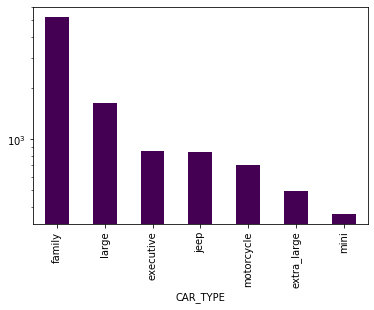

In [92]:
df5 = cars_df.groupby('CAR_TYPE').size()
df5 = df5.sort_values(ascending=False, inplace=False)
ax = df5.plot(kind = 'bar', cmap=plt.cm.viridis)
plt.yscale("log")

In [93]:
cars_df=cars_df[cars_df['CAR_TYPE']!='extra_large']

In [94]:
cars_df = cars_df.reset_index()

In [95]:
cars_df.head()

,EQUNR,TENDERNO,HATZAA_NO,CAR_POSITION,PRODUCT,MODEL,CAR_TYPE,KM,ENGINE_POWER,ENGINE_TYPE,...,TRADE,accident_ind,number_of_people_in_tender,number_of_cars_in_tender,number_of_offers_in_tender,year_of_tender,number_of_tenders_in_same_year,AGE,DATEROAD,SALE_PRICE
0,23,2014-103,8,משטרה,מאזדה,6,executive,15,2000,בנזין,...,0,0,307,278,3077,2014,12,5,2009,43800
1,63,2014-103,19,משטרה,מאזדה,6,executive,14,2000,בנזין,...,0,0,307,278,3077,2014,12,5,2009,50753
2,79,2014-103,17,משטרה,מאזדה,6,executive,18,2000,בנזין,...,0,0,307,278,3077,2014,12,4,2010,53670
3,140,2020-101,7,משטרה,קיה,ריאו,family,17,1400,בנזין,...,0,0,377,418,5107,2020,3,5,2015,22500
4,512,2014-103,15,משטרה,מאזדה,3,family,32,1600,בנזין,...,0,0,307,278,3077,2014,12,6,2008,22220


In [96]:
# כמה רכבים עם אותו שנתון יש במכרז
year=(cars_df.groupby(['TENDERNO','DATEROAD'])['EQUNR'].count()).reset_index()
year = year.rename({'EQUNR':'DATEROAD_NUM'},axis=1)
# year = year[['TENDERNO', 'DATEROAD','DATEROAD_NUM']]

In [97]:
km=(cars_df.groupby(['TENDERNO','KM'])['EQUNR'].count()).reset_index()
km = km.rename({'EQUNR':'KM_NUM'},axis=1)
# km = km[['TENDERNO', 'KM','KM_NUM']]

In [98]:
cars_df= pd.merge(cars_df, km, on =['TENDERNO', 'KM'], how='left')
cars_df= pd.merge(cars_df, year, on =['TENDERNO', 'DATEROAD'], how='left')

In [99]:
cars_df.head()

,EQUNR,TENDERNO,HATZAA_NO,CAR_POSITION,PRODUCT,MODEL,CAR_TYPE,KM,ENGINE_POWER,ENGINE_TYPE,...,number_of_people_in_tender,number_of_cars_in_tender,number_of_offers_in_tender,year_of_tender,number_of_tenders_in_same_year,AGE,DATEROAD,SALE_PRICE,KM_NUM,DATEROAD_NUM
0,23,2014-103,8,משטרה,מאזדה,6,executive,15,2000,בנזין,...,307,278,3077,2014,12,5,2009,43800,11,40
1,63,2014-103,19,משטרה,מאזדה,6,executive,14,2000,בנזין,...,307,278,3077,2014,12,5,2009,50753,13,40
2,79,2014-103,17,משטרה,מאזדה,6,executive,18,2000,בנזין,...,307,278,3077,2014,12,4,2010,53670,8,120
3,140,2020-101,7,משטרה,קיה,ריאו,family,17,1400,בנזין,...,377,418,5107,2020,3,5,2015,22500,12,117
4,512,2014-103,15,משטרה,מאזדה,3,family,32,1600,בנזין,...,307,278,3077,2014,12,6,2008,22220,2,48


In [100]:
# כמה רכבים מאותה קטגוריות סוג רכב היו במרכז
car_type = cars_df.groupby(['TENDERNO','CAR_TYPE'])['EQUNR'].count().reset_index()
car_type = car_type.rename({'EQUNR': 'CAR_TYPE_NUM'}, axis=1)
cars_df= pd.merge(cars_df, car_type, on =['TENDERNO', 'CAR_TYPE'], how='left')

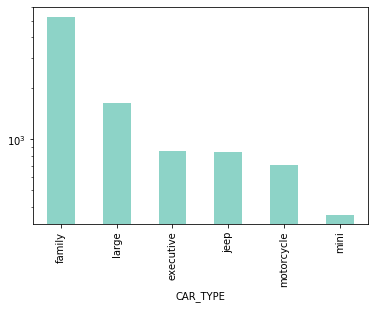

In [101]:
df4 = cars_df.groupby('CAR_TYPE').size()
df4 = df4.sort_values(ascending=False, inplace=False)
ax = df4.plot(kind = 'bar', cmap=plt.cm.Set3)
plt.yscale("log")

In [102]:
# הכנסת סוג מנוע לתוך 3 קטגוריות שונות
ENGINE_TYPE_Category = []
for i in cars_df['ENGINE_TYPE']:
    if i in ('בנזין', 'בנזין 95 אוקטן - נטול עופרת', 'בנזין 95 אוקטן'):
        ENGINE_TYPE_Category.append('Diesel')
    elif i in ('סולר', 'סולר טורבו'):
        ENGINE_TYPE_Category.append('Solar')
    else: 
        ENGINE_TYPE_Category.append('Hybrid')
                                           
cars_df['ENGINE_TYPE_Category'] = ENGINE_TYPE_Category
cars_df.drop('ENGINE_TYPE', axis=1, inplace=True)

In [103]:
#חלוקה הגיר לשתי קטגוריות
GEAR_TYPE_Category = []
for i in cars_df['GEAR_TYPE']:
    if i in ('robot','unknown'):
        GEAR_TYPE_Category.append('auto')
    else: 
        GEAR_TYPE_Category.append(i)
                                           
cars_df['GEAR_TYPE_Category'] = GEAR_TYPE_Category
cars_df.drop('GEAR_TYPE', axis=1, inplace=True)

In [104]:
cars_df=cars_df[cars_df['CAR_POSITION']!='רכב חילוט']

In [108]:
cars_df.loc[2,:]

EQUNR                                    79
TENDERNO                           2014-103
HATZAA_NO                                17
CAR_POSITION                          משטרה
PRODUCT                               מאזדה
MODEL                                     6
CAR_TYPE                          executive
KM                                       18
ENGINE_POWER                           2000
NO_OWNERS                                 0
CNTRC                                189000
TRADE                                     0
accident_ind                              0
number_of_people_in_tender              307
number_of_cars_in_tender                278
number_of_offers_in_tender             3077
year_of_tender                         2014
number_of_tenders_in_same_year           12
AGE                                       4
DATEROAD                               2010
SALE_PRICE                            53670
KM_NUM                                    8
DATEROAD_NUM                    

In [8]:
# sum of the sale price column
cars_df['SALE_PRICE'].sum()

363985076

### Building normalized Data Frame

-------------נרמול של העמודות הנורמיות על ידי לוג - שימוש בקטגוריות עבור מודל וסוג מנוע--------------

In [184]:
#מנרמלים את העמודות הנומריות על ידי שימוש בלוג
normalized_df=cars_df.copy()
normalized_df=normalized_df[normalized_df['CAR_TYPE']!='mini']
normalized_df.drop(['EQUNR', 'TENDERNO','MODEL','PRODUCT'], axis=1, inplace=True)
normalized_df=normalized_df.replace(0, np.nan)
list_to_normalize=['HATZAA_NO','ENGINE_POWER','NO_OWNERS','number_of_people_in_tender', 'CNTRC',
                  'number_of_cars_in_tender','number_of_offers_in_tender','year_of_tender',
                  'number_of_tenders_in_same_year', 'KM_NUM' ,'DATEROAD_NUM', 'CAR_TYPE_NUM','AGE', 'SALE_PRICE']
for col in list_to_normalize:
    normalized_df[col]=np.log(normalized_df[col])  

## 1. OLS REGRESSION on normalized DF

In [185]:
# הפיכת משתנים קטגוריאליים למשתני דמי
normalized_df=normalized_df.replace(np.nan, 0)

X= normalized_df.drop(['SALE_PRICE','HATZAA_NO','accident_ind','number_of_people_in_tender','year_of_tender', 'DATEROAD','KM'], axis=1)
X=pd.get_dummies(X, prefix=None, drop_first=True)
Y= normalized_df['SALE_PRICE']

X['KM_family']=X['CNTRC']*X['CAR_TYPE_family']
X['KM_large']=X['CNTRC']*X['CAR_TYPE_large']
X['KM_jeep']=X['CNTRC']*X['CAR_TYPE_jeep']
#X['KM_mini']=X['CNTRC']*X['CAR_TYPE_mini']
X['KM_motorcycle']=X['CNTRC']*X['CAR_TYPE_motorcycle']

In [186]:
import statsmodels.api as sm
X = sm.add_constant(X) ##let's add an intercept to our model
reg_model= sm.OLS(Y,X).fit()
predictions = reg_model.predict(X)
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             SALE_PRICE   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     652.2
Date:                Sat, 27 Jun 2020   Prob (F-statistic):               0.00
Time:                        23:16:30   Log-Likelihood:                -5614.1
No. Observations:                9301   AIC:                         1.128e+04
Df Residuals:                    9276   BIC:                         1.146e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             11.8297      0.433     27.350      0.000      10.982      12.678
ENGINE_POWER                       0.1754      0.011     15.542      0.000       0.153       0.198
NO_OWNERS                         -0.9893      0.109     -9.068      0.000      -1.203      -0.775
CNTRC                             -0.2060      0.033     -6.273      0.000      -0.270      -0.142
TRADE                             -1.3533      0.070    -19.338      0.000      -1.490      -1.216
number_of_cars_in_tender          -0.2221      0.029     -7.664      0.000      -0.279      -0.165
number_of_offers_in_tender         0.1759      0.026      6.719      0.000       0.125       0.227
number_of_tenders_in_same_year    -0.0841      0.014     -6.089      0.000      -0.111      -0.057
AGE                               -0.1807      0.021     -8.413      0.000      -0.223      -0.139
KM_NUM                             0.0299      0.007      4.240      0.000       0.016       0.044
DATEROAD_NUM                       0.0673      0.005     13.061      0.000       0.057       0.077
CAR_TYPE_NUM                      -0.0790      0.010     -8.112      0.000      -0.098      -0.060
CAR_POSITION_מינהל הרכב            0.1294      0.014      8.983      0.000       0.101       0.158
CAR_POSITION_משטרה                 0.0363      0.017      2.161      0.031       0.003       0.069
CAR_TYPE_family                   -1.6216      0.430     -3.768      0.000      -2.465      -0.778
CAR_TYPE_jeep                     -2.5658      0.501     -5.125      0.000      -3.547      -1.584
CAR_TYPE_large                    -2.8582      0.472     -6.054      0.000      -3.784      -1.933
CAR_TYPE_motorcycle               -5.9889      0.491    -12.194      0.000      -6.952      -5.026
ENGINE_TYPE_Category_Hybrid        0.1703      0.024      7.192      0.000       0.124       0.217
ENGINE_TYPE_Category_Solar         0.1794      0.026      6.992      0.000       0.129       0.230
GEAR_TYPE_Category_manual          0.0687      0.017      4.065      0.000       0.036       0.102
KM_family                          0.1225      0.035      3.468      0.001       0.053       0.192
KM_large                           0.2431      0.038      6.334      0.000       0.168       0.318
KM_jeep                            0.2515      0.040      6.216      0.000       0.172       0.331
KM_motorcycle                      0.4061      0.042      9.598      0.000       0.323       0.489
==============================================================================
Omnibus:                     1154.353   Durbin-Watson:                   1.177
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4919.594
Skew:                          -0.552   Prob(JB):                         

In [150]:
X.head()

,const,ENGINE_POWER,NO_OWNERS,CNTRC,TRADE,number_of_cars_in_tender,number_of_offers_in_tender,number_of_tenders_in_same_year,AGE,KM_NUM,...,CAR_TYPE_jeep,CAR_TYPE_large,CAR_TYPE_motorcycle,ENGINE_TYPE_Category_Hybrid,ENGINE_TYPE_Category_Solar,GEAR_TYPE_Category_manual,KM_family,KM_large,KM_jeep,KM_motorcycle
0,1.0,7.600902,0.0,11.951180,0.0,5.627621,8.031710,2.484907,1.609438,2.397895,...,0,0,0,0,0,0,0.000000,0.0,0.0,0.0
1,1.0,7.600902,0.0,11.884489,0.0,5.627621,8.031710,2.484907,1.609438,2.564949,...,0,0,0,0,0,0,0.000000,0.0,0.0,0.0
2,1.0,7.600902,0.0,12.149502,0.0,5.627621,8.031710,2.484907,1.386294,2.079442,...,0,0,0,0,0,0,0.000000,0.0,0.0,0.0
3,1.0,7.244228,0.0,12.077102,0.0,6.035481,8.538367,1.098612,1.609438,2.484907,...,0,0,0,0,0,0,12.077102,0.0,0.0,0.0
4,1.0,7.377759,0.0,12.679196,0.0,5.627621,8.031710,2.484907,1.791759,0.693147,...,0,0,0,0,0,0,12.679196,0.0,0.0,0.0


In [167]:
import math
b = math.exp(predictions[2])

In [114]:
X.loc[2,:]

const                              1.000000
ENGINE_POWER                       7.600902
NO_OWNERS                          0.000000
CNTRC                             12.149502
TRADE                              0.000000
number_of_cars_in_tender           5.627621
number_of_offers_in_tender         8.031710
number_of_tenders_in_same_year     2.484907
AGE                                1.386294
KM_NUM                             2.079442
DATEROAD_NUM                       4.787492
CAR_TYPE_NUM                       2.944439
CAR_POSITION_מינהל הרכב            0.000000
CAR_POSITION_משטרה                 1.000000
CAR_TYPE_family                    0.000000
CAR_TYPE_jeep                      0.000000
CAR_TYPE_large                     0.000000
CAR_TYPE_motorcycle                0.000000
ENGINE_TYPE_Category_Hybrid        0.000000
ENGINE_TYPE_Category_Solar         0.000000
GEAR_TYPE_Category_manual          0.000000
KM_family                          0.000000
KM_large                        

In [157]:
X['number_of_cars_in_tender'] = np.log(200)
X['CAR_TYPE_NUM'] = np.log(180)
X['KM_NUM'] = np.log(180)
X['DATEROAD_NUM'] = np.log(180)
# X.drop('const', axis=1, inplace=True)

In [152]:
X.head()

,ENGINE_POWER,NO_OWNERS,CNTRC,TRADE,number_of_cars_in_tender,number_of_offers_in_tender,number_of_tenders_in_same_year,AGE,KM_NUM,DATEROAD_NUM,...,CAR_TYPE_jeep,CAR_TYPE_large,CAR_TYPE_motorcycle,ENGINE_TYPE_Category_Hybrid,ENGINE_TYPE_Category_Solar,GEAR_TYPE_Category_manual,KM_family,KM_large,KM_jeep,KM_motorcycle
0,7.600902,0.0,11.951180,0.0,5.298317,8.031710,2.484907,1.609438,5.192957,5.192957,...,0,0,0,0,0,0,0.000000,0.0,0.0,0.0
1,7.600902,0.0,11.884489,0.0,5.298317,8.031710,2.484907,1.609438,5.192957,5.192957,...,0,0,0,0,0,0,0.000000,0.0,0.0,0.0
2,7.600902,0.0,12.149502,0.0,5.298317,8.031710,2.484907,1.386294,5.192957,5.192957,...,0,0,0,0,0,0,0.000000,0.0,0.0,0.0
3,7.244228,0.0,12.077102,0.0,5.298317,8.538367,1.098612,1.609438,5.192957,5.192957,...,0,0,0,0,0,0,12.077102,0.0,0.0,0.0
4,7.377759,0.0,12.679196,0.0,5.298317,8.031710,2.484907,1.791759,5.192957,5.192957,...,0,0,0,0,0,0,12.679196,0.0,0.0,0.0


In [158]:
perdictions_2 = reg_model.predict(X)

In [168]:
a = math.exp(perdictions_2.loc[2])

In [ ]:
normalized_df_new = normalized_df.loc[1,:].copy()

In [176]:
# כך המודל ניבא לפני ששינינו פרמטרים בהתאם להמלצות
import math
l = [math.exp(i) for i in predictions]
sum(l)

322376736.2629603

In [179]:
#ניבוי המודל אחרי יישום ההמלצות
from tqdm import tqdm_notebook
dic = {}
normalized_df_new = normalized_df.copy()
for i in tqdm_notebook(range(5,50,5)):
    normalized_df_new['number_of_cars_in_tender'] = normalized_df['number_of_cars_in_tender']+np.log(1-i/100)
    for i2 in range(5, 50, 5):
        normalized_df_new['CAR_TYPE_NUM'] = normalized_df['CAR_TYPE_NUM'] + np.log(1-i2/100)
        for i3 in range(5,50, 5):
            normalized_df_new['KM_NUM'] =normalized_df['KM_NUM']+np.log(1+i3/100)
            for i4 in range(5,50, 5):
                normalized_df_new['DATEROAD_NUM'] = normalized_df['DATEROAD_NUM']+np.log(1+i4/100)
                X= normalized_df_new.drop(['SALE_PRICE','HATZAA_NO','accident_ind','number_of_people_in_tender','year_of_tender'], axis=1)
                X=pd.get_dummies(X, prefix=None, drop_first=True)
                Y= normalized_df_new['SALE_PRICE']
                X['KM_family']=X['CNTRC']*X['CAR_TYPE_family']
                X['KM_large']=X['CNTRC']*X['CAR_TYPE_large']
                X['KM_jeep']=X['CNTRC']*X['CAR_TYPE_jeep']
                X['KM_motorcycle']=X['CNTRC']*X['CAR_TYPE_motorcycle']
            
                predictions = reg_model.predict(X)
                l2 = [math.exp(i) for i in predictions]
                dic[i,i2,i3,i4] = sum(l2)
print(max(dic))


(45, 45, 45, 45)


In [208]:
normalized_df_new = normalized_df.copy()
normalized_df_new['number_of_cars_in_tender'] = normalized_df['number_of_cars_in_tender']+np.log(0.7)
normalized_df_new['CAR_TYPE_NUM'] = normalized_df['CAR_TYPE_NUM'] + np.log(0.8)
normalized_df_new['KM_NUM'] =normalized_df['KM_NUM']+np.log(1.2)
normalized_df_new['DATEROAD_NUM'] = normalized_df['DATEROAD_NUM']+np.log(1.2)
normalized_df_new['number_of_offers_in_tender'] = normalized_df['number_of_offers_in_tender']+np.log(1.1)
X= normalized_df_new.drop(['SALE_PRICE','HATZAA_NO','accident_ind','number_of_people_in_tender','year_of_tender', 'DATEROAD','KM'], axis=1)
X=pd.get_dummies(X, prefix=None, drop_first=True)
X['KM_family']=X['CNTRC']*X['CAR_TYPE_family']
X['KM_large']=X['CNTRC']*X['CAR_TYPE_large']
X['KM_jeep']=X['CNTRC']*X['CAR_TYPE_jeep']
X['KM_motorcycle']=X['CNTRC']*X['CAR_TYPE_motorcycle']
X = sm.add_constant(X)
predictions = reg_model.predict(X)

In [209]:
l = [math.exp(i) for i in predictions]
sum(l)

367624594.94749755

In [210]:
367624594.94749755- 322376736.2629603


45247858.68453723

In [211]:
45247858.68453723/322376736.2629603


0.14035708410308145

In [181]:
print(max(dic.values()))

322684717.8173534


In [180]:
print(dic[45, 45, 45, 45])

322684717.8152987


In [178]:
322684717.81549096 - 322376736.2629603 

307981.5525306463

### Build dummies Data Frame

-------------הפיכת העמודות הנומריות לקטגוריות, ואז הפיכת כל המשתנים לדמי (לא משתמשים בכלל בלוג)- שימוש בקטגוריות עבור מודל וסוג מנוע--------------

In [46]:
# הפיכת המשתנים הנומריים לקטגוריות כדי שבהמשך נוכל להפוך אותם למשתני דמי
dummies_df=cars_df.copy()
dummies_df=dummies_df[dummies_df['CAR_TYPE']!='mini']
#dummies_df['range_offers'] = pd.cut(dummies_df['HATZAA_NO'], [0,5,10,20,100])
dummies_df['range_engine_power'] = pd.cut(dummies_df['ENGINE_POWER'], [0,1600,2000,10000])
dummies_df['range_owners'] = pd.cut(dummies_df['NO_OWNERS'], [0,1,5])
#dummies_df['range_people_in_tender'] = pd.cut(dummies_df['number_of_people_in_tender'], [0,200,300,400,500])
dummies_df['range_cars_in_tender'] = pd.cut(dummies_df['number_of_cars_in_tender'], [0,200,250,300,500])
dummies_df['range_offers_in_tender'] = pd.cut(dummies_df['number_of_offers_in_tender'], [0,2500,3500,5000])
#dummies_df['range_year'] = pd.cut(dummies_df['year_of_tender'], [0,2016,2020])
dummies_df['range_tenders_same_year'] = pd.cut(dummies_df['number_of_tenders_in_same_year'], [0,8,11,15])
dummies_df['range_km_num'] = pd.cut(dummies_df['KM_NUM'], [0,50,100,150,350])
dummies_df['range_dateroad_num'] = pd.cut(dummies_df['DATEROAD_NUM'], [0,400,800,1200,2500])
dummies_df['range_car_type_num'] = pd.cut(dummies_df['CAR_TYPE_NUM'], [0,5,10, 25, 50,100,150,200,250,300, 350,400, 450, 500])
dummies_df['range_age'] = pd.cut(dummies_df['AGE'], [0,4,5,6,20])
dummies_df['range_km'] = pd.cut(dummies_df['CNTRC'], [0,200000,250000,350000,1000000])
#dummies_df['range_price'] = pd.cut(dummies_df['SALE_PRICE'], [0,20000,30000,45000,100000])

In [47]:
# להוריד את כל העמודות הנומריות (הרי הפכנו אותם כבר לעמודות קטגוריאליות)
dummies_df.drop(['HATZAA_NO','ENGINE_POWER','NO_OWNERS','number_of_people_in_tender','CNTRC', 
                  'number_of_cars_in_tender','number_of_offers_in_tender','year_of_tender',
                  'number_of_tenders_in_same_year', 'KM_NUM' ,'DATEROAD_NUM', 'CAR_TYPE_NUM','AGE',
                'EQUNR', 'TENDERNO','MODEL','PRODUCT'], axis=1, inplace=True)

## 2. OLS REGRESSION on dummies DF

In [48]:
dummies_df=pd.get_dummies(dummies_df, prefix=None, drop_first=True)
dummies_df=dummies_df.replace(np.nan, 0)
X = dummies_df.drop(['SALE_PRICE','accident_ind'], axis=1)
Y = np.log(dummies_df['SALE_PRICE'])  

import statsmodels.api as sm
X = sm.add_constant(X) ##let's add an intercept to our model
reg_model= sm.OLS(Y,X).fit()
predictions = reg_model.predict(X)
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             SALE_PRICE   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     496.3
Date:                Sun, 21 Jun 2020   Prob (F-statistic):               0.00
Time:                        21:13:28   Log-Likelihood:                -5046.9
No. Observations:                9301   AIC:                         1.017e+04
Df Residuals:                    9262   BIC:                         1.045e+04
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  10.4674      0.045    231.654      0.000      10.379      10.556
TRADE                                  -1.2636      0.065    -19.587      0.000      -1.390      -1.137
CAR_POSITION_מינהל הרכב                 0.1300      0.014      9.408      0.000       0.103       0.157
CAR_POSITION_משטרה                      0.0232      0.018      1.285      0.199      -0.012       0.059
CAR_TYPE_family                        -0.1110      0.021     -5.208      0.000      -0.153      -0.069
CAR_TYPE_jeep                           0.1599      0.031      5.193      0.000       0.100       0.220
CAR_TYPE_large                         -0.0316      0.026     -1.210      0.226      -0.083       0.020
CAR_TYPE_motorcycle                    -1.5846      0.026    -61.712      0.000      -1.635      -1.534
ENGINE_TYPE_Category_Hybrid            -0.0085      0.023     -0.369      0.712      -0.053       0.037
ENGINE_TYPE_Category_Solar             -0.0529      0.025     -2.082      0.037      -0.103      -0.003
GEAR_TYPE_Category_manual               0.1322      0.016      8.295      0.000       0.101       0.163
range_engine_power_(1600, 2000]         0.2834      0.015     18.812      0.000       0.254       0.313
range_engine_power_(2000, 10000]        0.7982      0.021     37.149      0.000       0.756       0.840
range_owners_(1, 5]                    -0.8048      0.080    -10.075      0.000      -0.961      -0.648
range_cars_in_tender_(200, 250]        -0.0573      0.016     -3.485      0.000      -0.090      -0.025
range_cars_in_tender_(250, 300]        -0.0821      0.018     -4.628      0.000      -0.117      -0.047
range_cars_in_tender_(300, 500]        -0.1002      0.026     -3.882      0.000      -0.151      -0.050
range_offers_in_tender_(2500, 3500]    -0.0053      0.013     -0.401      0.688      -0.031       0.020
range_offers_in_tender_(3500, 5000]     0.0612      0.017      3.627      0.000       0.028       0.094
range_tenders_same_year_(8, 11]        -0.1026      0.013     -7.770      0.000      -0.128      -0.077
range_tenders_same_year_(11, 15]       -0.0765      0.013     -5.843      0.000      -0.102      -0.051
range_km_num_(50, 100]                  0.0761      0.014      5.588      0.000       0.049       0.103
range_km_num_(100, 150]                 0.0995      0.015      6.467      0.000       0.069       0.130
range_km_num_(150, 350]                 0.1598      0.017      9.575      0.000       0.127       0.193
range_dateroad_num_(400, 800]           0.0957      0.014      6.886      0.000       0.068       0.123
range_dateroad_num_(800, 1200]          0.1055      0.016      6.588      0.000       0.074       0.137
range_dateroad_num_(1200, 2500]         0.0843      0.015      5.53

# Random forest

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.35)
rf = RandomForestRegressor(n_estimators=10)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [48]:
rf.score(X_test, y_test)

0.844504135058735

In [49]:
import numpy as np
sort_order = np.argsort(rf.feature_importances_)[::-1]

for i,feature_index in enumerate(sort_order): 
    feature = X.columns[ feature_index ]
    imp = rf.feature_importances_[ feature_index ]
    print ('{0:d}. {1:s} Weight\t- {2:4.2f}'.format(i+1,feature, imp))

1. ENGINE_POWER Weight	- 0.49
2. CAR_TYPE_motorcycle Weight	- 0.19
3. DATEROAD_NUM Weight	- 0.06
4. AGE Weight	- 0.04
5. KM_motorcycle Weight	- 0.04
6. CNTRC Weight	- 0.03
7. number_of_tenders_in_same_year Weight	- 0.02
8. KM_NUM Weight	- 0.02
9. KM_family Weight	- 0.02
10. CAR_TYPE_NUM Weight	- 0.01
11. number_of_cars_in_tender Weight	- 0.01
12. number_of_offers_in_tender Weight	- 0.01
13. CAR_POSITION_מינהל הרכב Weight	- 0.01
14. KM_large Weight	- 0.01
15. TRADE Weight	- 0.01
16. KM_jeep Weight	- 0.00
17. GEAR_TYPE_Category_manual Weight	- 0.00
18. CAR_POSITION_משטרה Weight	- 0.00
19. CAR_TYPE_large Weight	- 0.00
20. ENGINE_TYPE_Category_Hybrid Weight	- 0.00
21. ENGINE_TYPE_Category_Solar Weight	- 0.00
22. CAR_TYPE_family Weight	- 0.00
23. CAR_TYPE_jeep Weight	- 0.00
24. NO_OWNERS Weight	- 0.00
25. CAR_POSITION_רכב חילוט Weight	- 0.00
26. const Weight	- 0.00


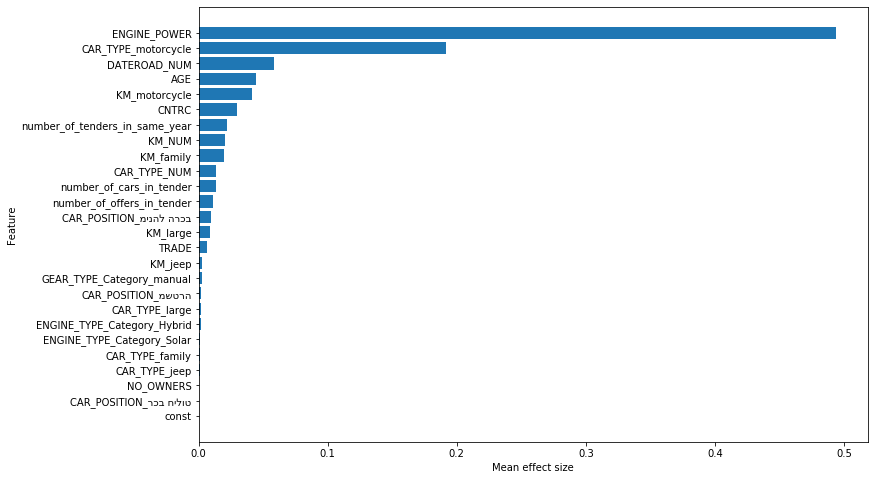

In [51]:
sort_order = np.argsort(rf.feature_importances_)
x = range(len(sort_order))
y = rf.feature_importances_[sort_order]
y_ticks = np.array(X.columns)[sort_order]
fig, ax = plt.subplots(figsize=(12,8))
plt.barh(x,y)
plt.xlabel('Mean effect size'); plt.ylabel('Feature');
ax.set_yticks(x)
ax.set_yticklabels(y_ticks);
plt.show()